<a href="https://colab.research.google.com/github/jmmiddour/DS-Unit-1-Sprint-1-Data-Wrangling-and-Storytelling/blob/master/module1-exploratory-data-analysis/LS_DS_111_Exploratory_Data_Analysis_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Practice Loading and Exploring Datasets

This assignment is purposely open-ended. You will be asked to load datasets from the [UC-Irvine Machine Learning Repository](https://archive.ics.uci.edu/ml/index.php). 

Even though you maybe using different datasets than your fellow classmates, try and be supportive and assist each other in the challenges that you are facing. You will only deepend your understanding of these topics as you work to assist one another. Many popular UCI datasets face similar data loading challenges.

Remember that the UCI datasets do not necessarily have a file type of `.csv` so it's important that you learn as much as you can about the dataset before you try and load it. See if you can look at the raw text of the file either locally or using the `!curl` shell command -or in some other way before you try and read it in as a dataframe. This will help you catch what would otherwise be unforseen problems.

Feel free to embellish this notebook with additional markdown cells,code cells, comments, graphs, etc. Whatever you think helps adequately address the questions.

## 1) Load a dataset from UCI (via its URL)

Please navigate to the home page and choose a dataset (other than the Adult dataset) from the "Most Popular" section on the right-hand side of the home page. Load the dataset via its URL and check the following (show your work):

- Are the headers showing up properly?
- Look at the first 5 and the last 5 rows, do they seem to be in order?
- Does the dataset have the correct number of rows and columns as described in the UCI page? 
 - Remember, that UCI does not count the y variable (column of values that we might want to predict via a machine learning model) as an "attribute" but rather as a "class attribute" so you may end up seeing a number of columns that is one greater than the number listed on the UCI website.
- Does UCI list this dataset as having missing values? Check for missing values and see if your analysis corroborates what UCI reports?
- if `NaN` values or other missing value indicators are not being detected by `df.isnull().sum()` find a way to replace whatever is indicating the missing values with `np.NaN`.
- Use the .describe() function in order to see the summary statistics of both the numeric and non-numeric columns. 

In [0]:
# Import libraries I need to use
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [0]:
# There are no headers included in the data set. Need to add.
# source: https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.names
column_headers = ['Class', 'Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash', 
                  'Magnesium', 'Total phenols', 'Flavanoids', 
                  'Nonflavanoid phenols', 'Proanthocyanins', 
                  'Color intensity', 'Hue', 'OD280/OD315 of diluted wines', 
                  'Proline']

In [3]:
# Read in the Wine data set from UCI
# source: https://archive.ics.uci.edu/ml/datasets/Wine
wine = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data', 
                   header=None, names=column_headers)

# Check to make sure the headers line up properly at the start of the data set
# According to the source the first attribute is "Class Identifier" not index
#   number. Added new column above to 'column_headers'.
wine.head()

,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [4]:
# Check to make sure headers line up properly at the end of data set
wine.tail()

,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.7,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.3,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.2,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.3,0.60,1.62,840
177,3,14.13,4.10,2.74,24.5,96,2.05,0.76,0.56,1.35,9.2,0.61,1.60,560


In [5]:
# Check the shape of the data set
# Have one more column then source states because I needed to add an extra 
#   column for the "Class Identifier"
wine.shape

(178, 14)

In [6]:
# Check for NaN values.
# Source says no NaN values and they are correct.
wine.isnull().sum()

Class                           0
Alcohol                         0
Malic acid                      0
Ash                             0
Alcalinity of ash               0
Magnesium                       0
Total phenols                   0
Flavanoids                      0
Nonflavanoid phenols            0
Proanthocyanins                 0
Color intensity                 0
Hue                             0
OD280/OD315 of diluted wines    0
Proline                         0
dtype: int64

In [7]:
# Check to see if there might be null values not caught by isnull.
# Run multiple sample sets to see if I can catch anything that may need to be NaN
# Looks like the source is correct.
wine.sample(10)

,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
140,3,12.93,2.81,2.70,21.0,96,1.54,0.50,0.53,0.75,4.60,0.77,2.31,600
155,3,13.17,5.19,2.32,22.0,93,1.74,0.63,0.61,1.55,7.90,0.60,1.48,725
52,1,13.82,1.75,2.42,14.0,111,3.88,3.74,0.32,1.87,7.05,1.01,3.26,1190
76,2,13.03,0.90,1.71,16.0,86,1.95,2.03,0.24,1.46,4.60,1.19,2.48,392
137,3,12.53,5.51,2.64,25.0,96,1.79,0.60,0.63,1.10,5.00,0.82,1.69,515
177,3,14.13,4.10,2.74,24.5,96,2.05,0.76,0.56,1.35,9.20,0.61,1.60,560
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
89,2,12.08,1.33,2.30,23.6,70,2.20,1.59,0.42,1.38,1.74,1.07,3.21,625
125,2,12.07,2.16,2.17,21.0,85,2.60,2.65,0.37,1.35,2.76,0.86,3.28,378
144,3,12.25,3.88,2.20,18.5,112,1.38,0.78,0.29,1.14,8.21,0.65,2.00,855


In [8]:
wine.describe()

,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


## 2) Load a dataset from your local machine.
Choose a second dataset from the "Popular Datasets" listing on UCI, but this time download it to your local machine instead of reading it in via the URL. Upload the file to Google Colab using the files tab in the left-hand sidebar or by importing `files` from `google.colab` The following link will be a useful resource if you can't remember the syntax: <https://towardsdatascience.com/3-ways-to-load-csv-files-into-colab-7c14fcbdcb92>

- Answer all of the same bullet point questions from part 1 again on this new dataset. 


In [0]:
# The data set for Car Evaluation does not have any headers in the data set.
# Have to add the headers
column_headers2 = ['Buying', 'Maint', 'Doors', 'Persons', 'Lug_Boot', 
                   'Safety', 'Class']

In [10]:
# Upload the "cars" file to Colab first.
# source: https://archive.ics.uci.edu/ml/datasets/Car+Evaluation
# Read the file from Colab
cars = pd.read_csv('/content/car.csv', 
                   header=None, names=column_headers2)

# Print header to check for header alignment
cars.head()

,Buying,Maint,Doors,Persons,Lug_Boot,Safety,Class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [11]:
# Print the last 5 to check alignment
cars.tail()

,Buying,Maint,Doors,Persons,Lug_Boot,Safety,Class
1723,low,low,5more,more,med,med,good
1724,low,low,5more,more,med,high,vgood
1725,low,low,5more,more,big,low,unacc
1726,low,low,5more,more,big,med,good
1727,low,low,5more,more,big,high,vgood


In [12]:
# Check the size of the rows and columns
# Have one more column then the source because had to add 
# a column for the "Class Values"
cars.shape

(1728, 7)

In [13]:
# Check for missing values
# The source says no missing values. They are correct.
cars.isnull().sum()

Buying      0
Maint       0
Doors       0
Persons     0
Lug_Boot    0
Safety      0
Class       0
dtype: int64

In [14]:
# Check to verify there are not any missing values not caught above.
# Run multiple sample sets to see if I see any missing values.
# Ran it 10 times and compared to what source said the variables should be in 
#   the columns. Did not find anything inaccurate.
cars.sample(10)

,Buying,Maint,Doors,Persons,Lug_Boot,Safety,Class
1096,med,med,2,4,big,med,acc
1684,low,low,4,4,small,med,acc
698,high,med,3,more,med,high,acc
199,vhigh,high,5more,4,small,med,unacc
1239,med,low,3,more,big,low,unacc
54,vhigh,vhigh,4,2,small,low,unacc
564,high,high,2,more,big,low,unacc
272,vhigh,med,4,2,small,high,unacc
1149,med,med,4,4,big,low,unacc
831,high,low,4,more,med,low,unacc


In [15]:
# All of the values in the unique row match what the source says.
cars.describe()

,Buying,Maint,Doors,Persons,Lug_Boot,Safety,Class
count,1728,1728,1728,1728,1728,1728,1728
unique,4,4,4,3,3,3,4
top,high,high,4,4,big,high,unacc
freq,432,432,432,576,576,576,1210


## 3) Make Crosstabs of the Categorical Variables

Take whichever of the above datasets has more categorical variables and use crosstabs to tabulate the different instances of the categorical variables.


In [16]:
# Check types for wine data set
# The wine data set does not have any categorical varibles
wine.dtypes

Class                             int64
Alcohol                         float64
Malic acid                      float64
Ash                             float64
Alcalinity of ash               float64
Magnesium                         int64
Total phenols                   float64
Flavanoids                      float64
Nonflavanoid phenols            float64
Proanthocyanins                 float64
Color intensity                 float64
Hue                             float64
OD280/OD315 of diluted wines    float64
Proline                           int64
dtype: object

In [17]:
# Check types for cars data set
# The cars data set has all categorical variables
cars.dtypes

Buying      object
Maint       object
Doors       object
Persons     object
Lug_Boot    object
Safety      object
Class       object
dtype: object

In [18]:
# Pulling a random set of values in specific categories
cars[['Buying', 'Maint', 'Persons', 'Safety']].sample(10)

,Buying,Maint,Persons,Safety
1635,low,low,4,low
1681,low,low,2,med
290,vhigh,med,more,high
709,high,med,2,med
1384,low,vhigh,2,med
1552,low,med,4,med
1355,low,vhigh,2,high
1391,low,vhigh,4,high
168,vhigh,high,2,low
1573,low,med,2,med


In [19]:
# Using crosstab to compare Buying price to the capacity of people in car
# To me this looks odd because the values are all identical
pd.crosstab(cars['Buying'], cars['Persons'])

Persons,2,4,more
Buying,,,
high,144,144,144
low,144,144,144
med,144,144,144
vhigh,144,144,144


In [20]:
# Use crosstab to compare Buying with estimated Safety of the car
# Again, all the values are identical. This does not look right.
pd.crosstab(cars['Buying'], cars['Safety'])

Safety,high,low,med
Buying,,,
high,144,144,144
low,144,144,144
med,144,144,144
vhigh,144,144,144


In [21]:
# Since all values are identical on both crosstabs I pulled above, going to look
#   at the value counts of the buying price because this does not look right 
#   to me.
# To me this looks odd because all value counts are the same for each variable.
cars['Buying'].value_counts()

high     432
low      432
vhigh    432
med      432
Name: Buying, dtype: int64

In [22]:
# Since all values are identical on both crosstabs I pulled above, going to look
#   at the value counts of the price of maintenance because this does not look
#   right to me.
# To me this looks odd because all value counts are the same for each variable.
cars['Maint'].value_counts()

high     432
low      432
vhigh    432
med      432
Name: Maint, dtype: int64

In [23]:
# Since all values are identical on both crosstabs I pulled above, going to look
#   at the value counts of the number of doors because this does not look right
#   to me.
# To me this looks odd because all value counts are the same for each variable.
cars['Doors'].value_counts()

4        432
3        432
2        432
5more    432
Name: Doors, dtype: int64

In [24]:
# Since all values are identical on both crosstabs I pulled above, going to look
#   at the value counts of persons carrying capacity because this does not look
#   right to me.
# To me this looks odd because all value counts are the same for each variable.
cars['Persons'].value_counts()

4       576
2       576
more    576
Name: Persons, dtype: int64

In [25]:
# Since all values are identical on both crosstabs I pulled above, going to look
#   at the value counts of the size of Luggage Boot because this does not look
#   right to me.
# To me this looks odd because all value counts are the same for each variable.
cars['Lug_Boot'].value_counts()

big      576
small    576
med      576
Name: Lug_Boot, dtype: int64

In [26]:
# Since all values are identical on both crosstabs I pulled above, going to look
#   at the value counts of estimated safety of car because this does not look 
#   right to me.
# To me this looks odd because all value counts are the same for each variable.
cars['Safety'].value_counts()

high    576
low     576
med     576
Name: Safety, dtype: int64

In [27]:
# Since all values are identical on both crosstabs I pulled above, going to look
#   at the value counts of Class Values because this does not look right to me.
# This is the only column where the values are not identical for all values.
cars['Class'].value_counts()

unacc    1210
acc       384
good       69
vgood      65
Name: Class, dtype: int64

In [28]:
pd.crosstab(cars['Buying'], cars['Class'])

Class,acc,good,unacc,vgood
Buying,,,,
high,108,0,324,0
low,89,46,258,39
med,115,23,268,26
vhigh,72,0,360,0


## 4) Explore the distributions of the variables of the dataset using:
- Histograms
- Scatterplots
- Density Plots

In [29]:
# I am using the wine data set for these visualizations because cars has mostly 
#   string values and the values do not have much variation to them.
wine.sample(10)

,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
146,3,13.88,5.04,2.23,20.0,80,0.98,0.34,0.40,0.68,4.90,0.58,1.33,415
145,3,13.16,3.57,2.15,21.0,102,1.50,0.55,0.43,1.30,4.00,0.60,1.68,830
167,3,12.82,3.37,2.30,19.5,88,1.48,0.66,0.40,0.97,10.26,0.72,1.75,685
44,1,13.05,1.77,2.10,17.0,107,3.00,3.00,0.28,2.03,5.04,0.88,3.35,885
58,1,13.72,1.43,2.50,16.7,108,3.40,3.67,0.19,2.04,6.80,0.89,2.87,1285
105,2,12.42,2.55,2.27,22.0,90,1.68,1.84,0.66,1.42,2.70,0.86,3.30,315
68,2,13.34,0.94,2.36,17.0,110,2.53,1.30,0.55,0.42,3.17,1.02,1.93,750
6,1,14.39,1.87,2.45,14.6,96,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290
28,1,13.87,1.90,2.80,19.4,107,2.95,2.97,0.37,1.76,4.50,1.25,3.40,915
91,2,12.00,1.51,2.42,22.0,86,1.45,1.25,0.50,1.63,3.60,1.05,2.65,450


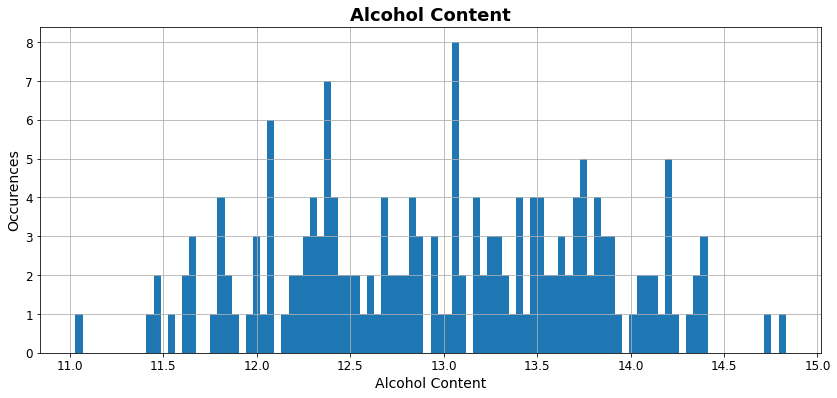

In [30]:
# Plot a histogram to show the difference in Alcohol content.
wine['Alcohol'].hist(bins=100, figsize=(14,6))
plt.ylabel('Occurences', fontsize=14)
plt.xlabel('Alcohol Content', fontsize=14)
plt.title('Alcohol Content', fontsize=18, fontweight='bold')
plt.tick_params(labelsize=12);

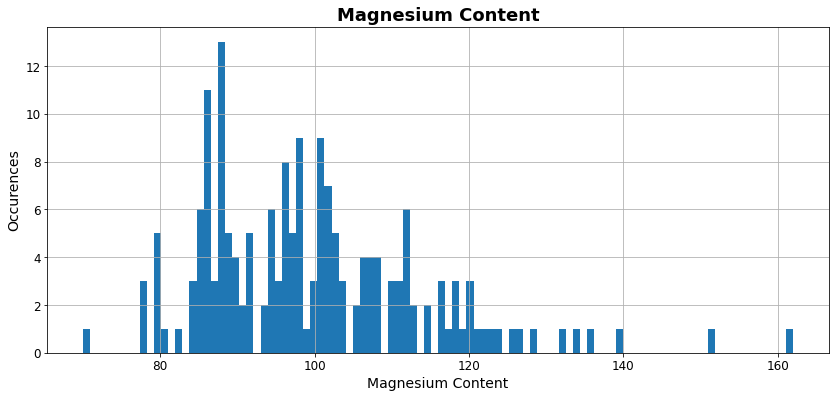

In [31]:
# Plot a histogram to show the difference in Magnesium Content.
wine['Magnesium'].hist(bins=100, figsize=(14,6))
plt.ylabel('Occurences', fontsize=14)
plt.xlabel('Magnesium Content', fontsize=14)
plt.title('Magnesium Content', fontsize=18, fontweight='bold')
plt.tick_params(labelsize=12);

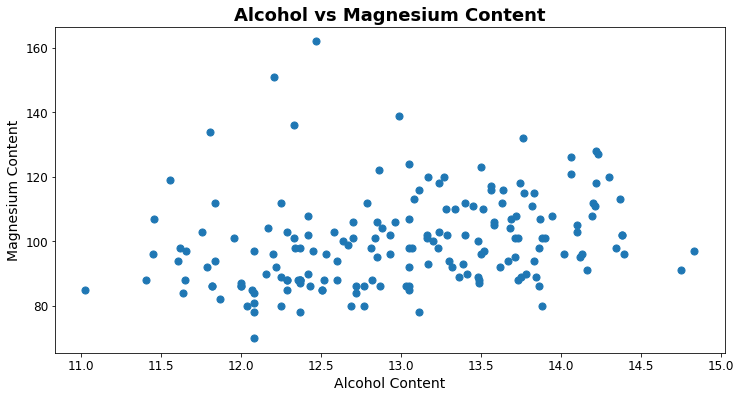

In [32]:
# Use a scatter plot to compare amount of Alcohol Content to Magnesium Content
# This is showing some linear collalation.
wine.plot.scatter('Alcohol', 'Magnesium', s=50, figsize=(12, 6))
plt.ylabel('Magnesium Content', fontsize=14)
plt.xlabel('Alcohol Content', fontsize=14)
plt.title('Alcohol vs Magnesium Content', fontsize=18, fontweight='bold')
plt.tick_params(labelsize=12);

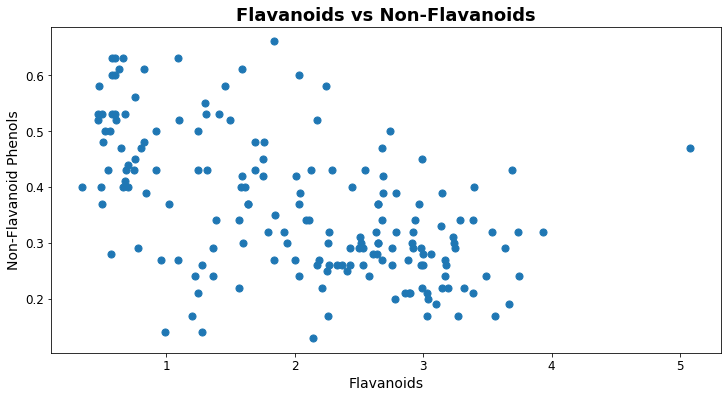

In [33]:
# Use a scatter plot to compare amount of Flavanoids to Non-Flavanoid Phenols
# This is not showing a linear collalation.
wine.plot.scatter('Flavanoids', 'Nonflavanoid phenols', s=50, figsize=(12, 6))
plt.ylabel('Non-Flavanoid Phenols', fontsize=14)
plt.xlabel('Flavanoids', fontsize=14)
plt.title('Flavanoids vs Non-Flavanoids', fontsize=18, fontweight='bold')
plt.tick_params(labelsize=12);

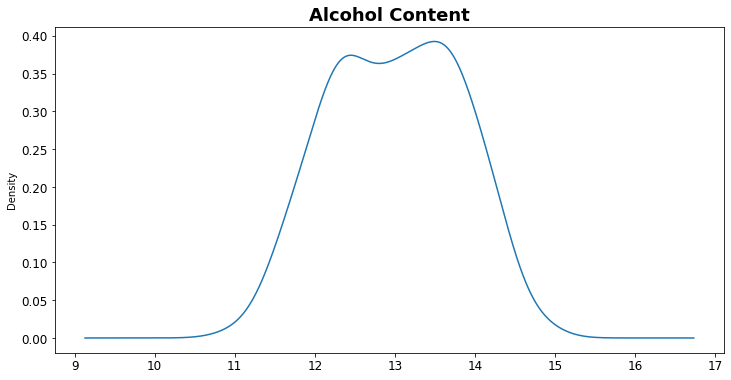

In [34]:
# Use a Density plot to show the Alcohol content.
wine['Alcohol'].plot.density(figsize=(12, 6))
plt.title('Alcohol Content', fontsize=18, fontweight='bold')
plt.tick_params(labelsize=12);

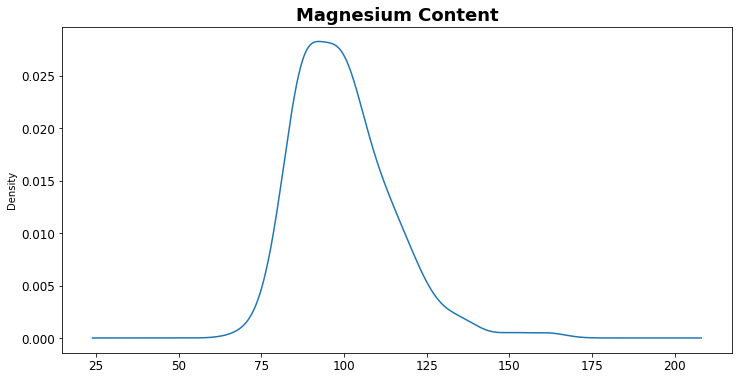

In [35]:
# Use a Density plot to show the Magnesium content.
wine['Magnesium'].plot.density(figsize=(12, 6))
plt.title('Magnesium Content', fontsize=18, fontweight='bold')
plt.tick_params(labelsize=12);

## 5) Create at least one visualization from a crosstab:

Remember that a crosstab is just a dataframe and can be manipulated in the same way by row index, column, index, or column/row/cell position.


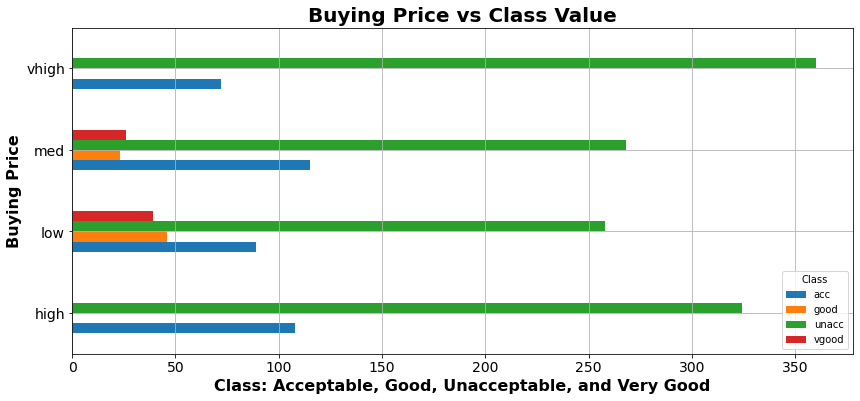

In [36]:
# Using Cars data set because this is the better data set to use for crosstabs.
# Set a variable for my crosstab
bc = pd.crosstab(cars['Buying'], cars['Class'])

# Ploting my above crosstab using a horizontal bar graph
bc.plot(kind='barh', figsize=(14,6))
plt.ylabel('Buying Price', fontsize=16, fontweight='bold')
plt.xlabel('Class: Acceptable, Good, Unacceptable, and Very Good', fontsize=16,
           fontweight='bold')
plt.title('Buying Price vs Class Value', fontsize=20, fontweight='bold')
plt.tick_params(labelsize=14)
plt.grid(b=True);

## Stretch Goals 

The following additional study tasks are optional, they are intended to give you an opportunity to stretch yourself beyond the main requirements of the assignment. You can pick and choose from the below, you do not need to complete them in any particular order.

### - Practice Exploring other Datasets

### -  Try using the Seaborn plotting library's "Pairplot" functionality in order to explore all of the possible histograms and scatterplots of your dataset all at once:

[Seaborn Pairplot](https://seaborn.pydata.org/generated/seaborn.pairplot.html)

### - Turn some of the continuous variables into categorical variables by binning the values using:
- [pd.cut()](https://pandas.pydata.org/pandas-docs/version/0.23.4/generated/pandas.cut.html)
- [pd.qcut()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.qcut.html)
- <https://stackoverflow.com/questions/30211923/what-is-the-difference-between-pandas-qcut-and-pandas-cut>

And then use crosstabs to compare/visualize these binned variables against the other variables.


### - Other types and sources of data
Not all data comes in a nice single file - for example, image classification involves handling lots of image files. You still will probably want labels for them, so you may have tabular data in addition to the image blobs - and the images may be reduced in resolution and even fit in a regular csv as a bunch of numbers.

If you're interested in natural language processing and analyzing text, that is another example where, while it can be put in a csv, you may end up loading much larger raw data and generating features that can then be thought of in a more standard tabular fashion.

Overall you will in the course of learning data science deal with loading data in a variety of ways. Another common way to get data is from a database - most modern applications are backed by one or more databases, which you can query to get data to analyze. We'll cover this more in our data engineering unit.

How does data get in the database? Most applications generate logs - text files with lots and lots of records of each use of the application. Databases are often populated based on these files, but in some situations you may directly analyze log files. The usual way to do this is with command line (Unix) tools - command lines are intimidating, so don't expect to learn them all at once, but depending on your interests it can be useful to practice.

One last major source of data is APIs: https://github.com/toddmotto/public-apis

API stands for Application Programming Interface, and while originally meant e.g. the way an application interfaced with the GUI or other aspects of an operating system, now it largely refers to online services that let you query and retrieve data. You can essentially think of most of them as "somebody else's database" - you have (usually limited) access.

*Stretch goal* - research one of the above extended forms of data/data loading. See if you can get a basic example working in a notebook. Image, text, or (public) APIs are probably more tractable - databases are interesting, but there aren't many publicly accessible and they require a great deal of setup.